In [5]:
import numpy as np
import torch as th
from torch.autograd import Variable
from collections import defaultdict as ddict
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [6]:
model = th.load('../data/synth_simple.pth')

In [7]:
model.keys()

dict_keys(['model', 'epoch', 'objects'])

In [ ]:
for idx, item in enumeratE(model['objects']):
    model['objects']
    if idx >= 30:
        break

In [ ]:
embed = model['model']['lt.weight'].numpy()
print(embed.shape)

### Plot graphs with features

In [ ]:
for idx in range(len(colors)):
    if model['objects'][idx]['feature'] == -1:
        colors[idx] = 1
    else:
        colors[idx] = -1

plt.figure(figsize=(10,10))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,0]
    y = embed[idx,1]
    
    if model['objects'][idx]['feature'] == -1:
        fsize = 18
        size = 200
        displacement = 1.01
        marker = 'X'
        color = 'orange'
    else:
        fsize = 12
        size = 200
        displacement = -1.01
        marker = '.'
        color= 'purple'
    ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
    if model['objects'][idx]['feature'] == -1:
        #print(x,y)
        plt.text(x * ( displacement), y * ( displacement) , model['objects'][idx]['name'], fontsize=20)

#ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()

### Plot simple graphs without features

(201, 5)


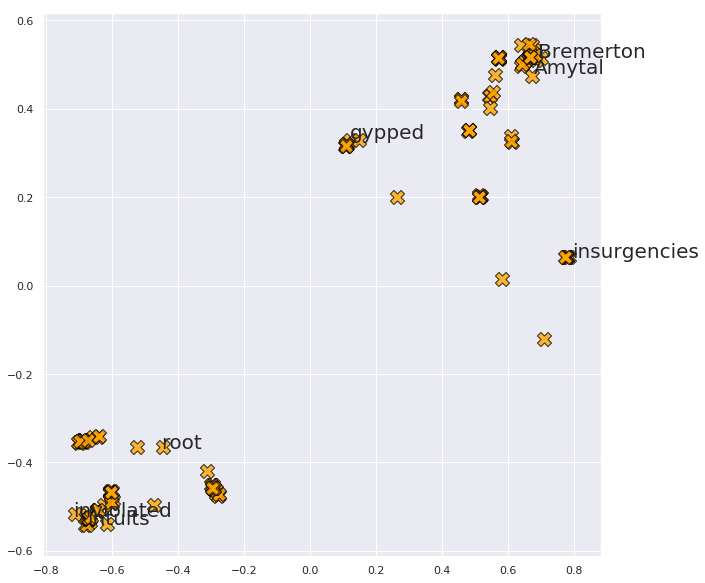

In [21]:
model = th.load('../data/synth_simple.pth')
embed = model['model']['lt.weight'].numpy()
print(embed.shape)
colors = np.zeros(len(model['objects']))
plt.figure(figsize=(10,10))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,2]
    y = embed[idx,4]
    
    fsize = 20
    size = 200
    displacement = 1.01
    marker = 'X'
    color = 'orange'

    ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
    rootest = ['root', 'adriatic', 'intuits', 'Amytal', 'inviolated', 'Bremerton', 'gypped', 'insurgencies'] #, 'foliar', , 62, 63, 96, 53]
    if model['objects'][idx] in rootest:
        plt.text(x * ( displacement), y * ( displacement) , model['objects'][idx], fontsize=fsize)

#ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()